In [1]:
#This Python 3 environment comes with many helpful analytics libraries installed
#It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
#For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Input data files are available in the read-only "../input/" directory
#For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.offline as py
import matplotlib.pyplot as plt
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

C:\Users\kamal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def read_csv(dataset): 
    df = pd.read_csv(dataset)
    print(df.tail())
    return df

In [3]:
df = read_csv('country_wise_latest.csv')

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
182          

In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
display(df['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [6]:
colors =[[0.05,"0A7F0A"],[0.1,"16790A"],[0.15,"21720A"],[0.2,"2D6C0A"],[0.25,"39660A"],[0.3,"456009"],[0.35,"505909"],[0.4,"5C5309"],[0.45,"684D09"],[0.5,"744709"],[0.55,"7F4009"],[0.6,"8B3A09"],[0.65,"973409"],[0.7,"A32E09"],[0.75,"AE2709"],[0.8,"BA2108"],[0.85,"C61B08"],[0.95,"D21508"],[1,"DD0E08"]]


countries = df['Country/Region']
end = df['Confirmed']

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = end,
        locationmode = 'country names',
        text = countries,
        colorscale = colors,
        showscale = True,

        marker = dict(
            line = dict(color = 'rgb(100,100,100)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Covid Cases by Frequency ')
            )
       ]

layout = dict(
    title = 'Covid 19 Cases by Country',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(255, 255, 255)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(255, 255, 255)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [7]:
fg=pd.read_csv('full_grouped.csv')

In [8]:
fg.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [9]:
fg.iloc[[3000]]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
3000,2020-02-07,Australia,15,0,2,13,1,0,0,Western Pacific


<AxesSubplot:>

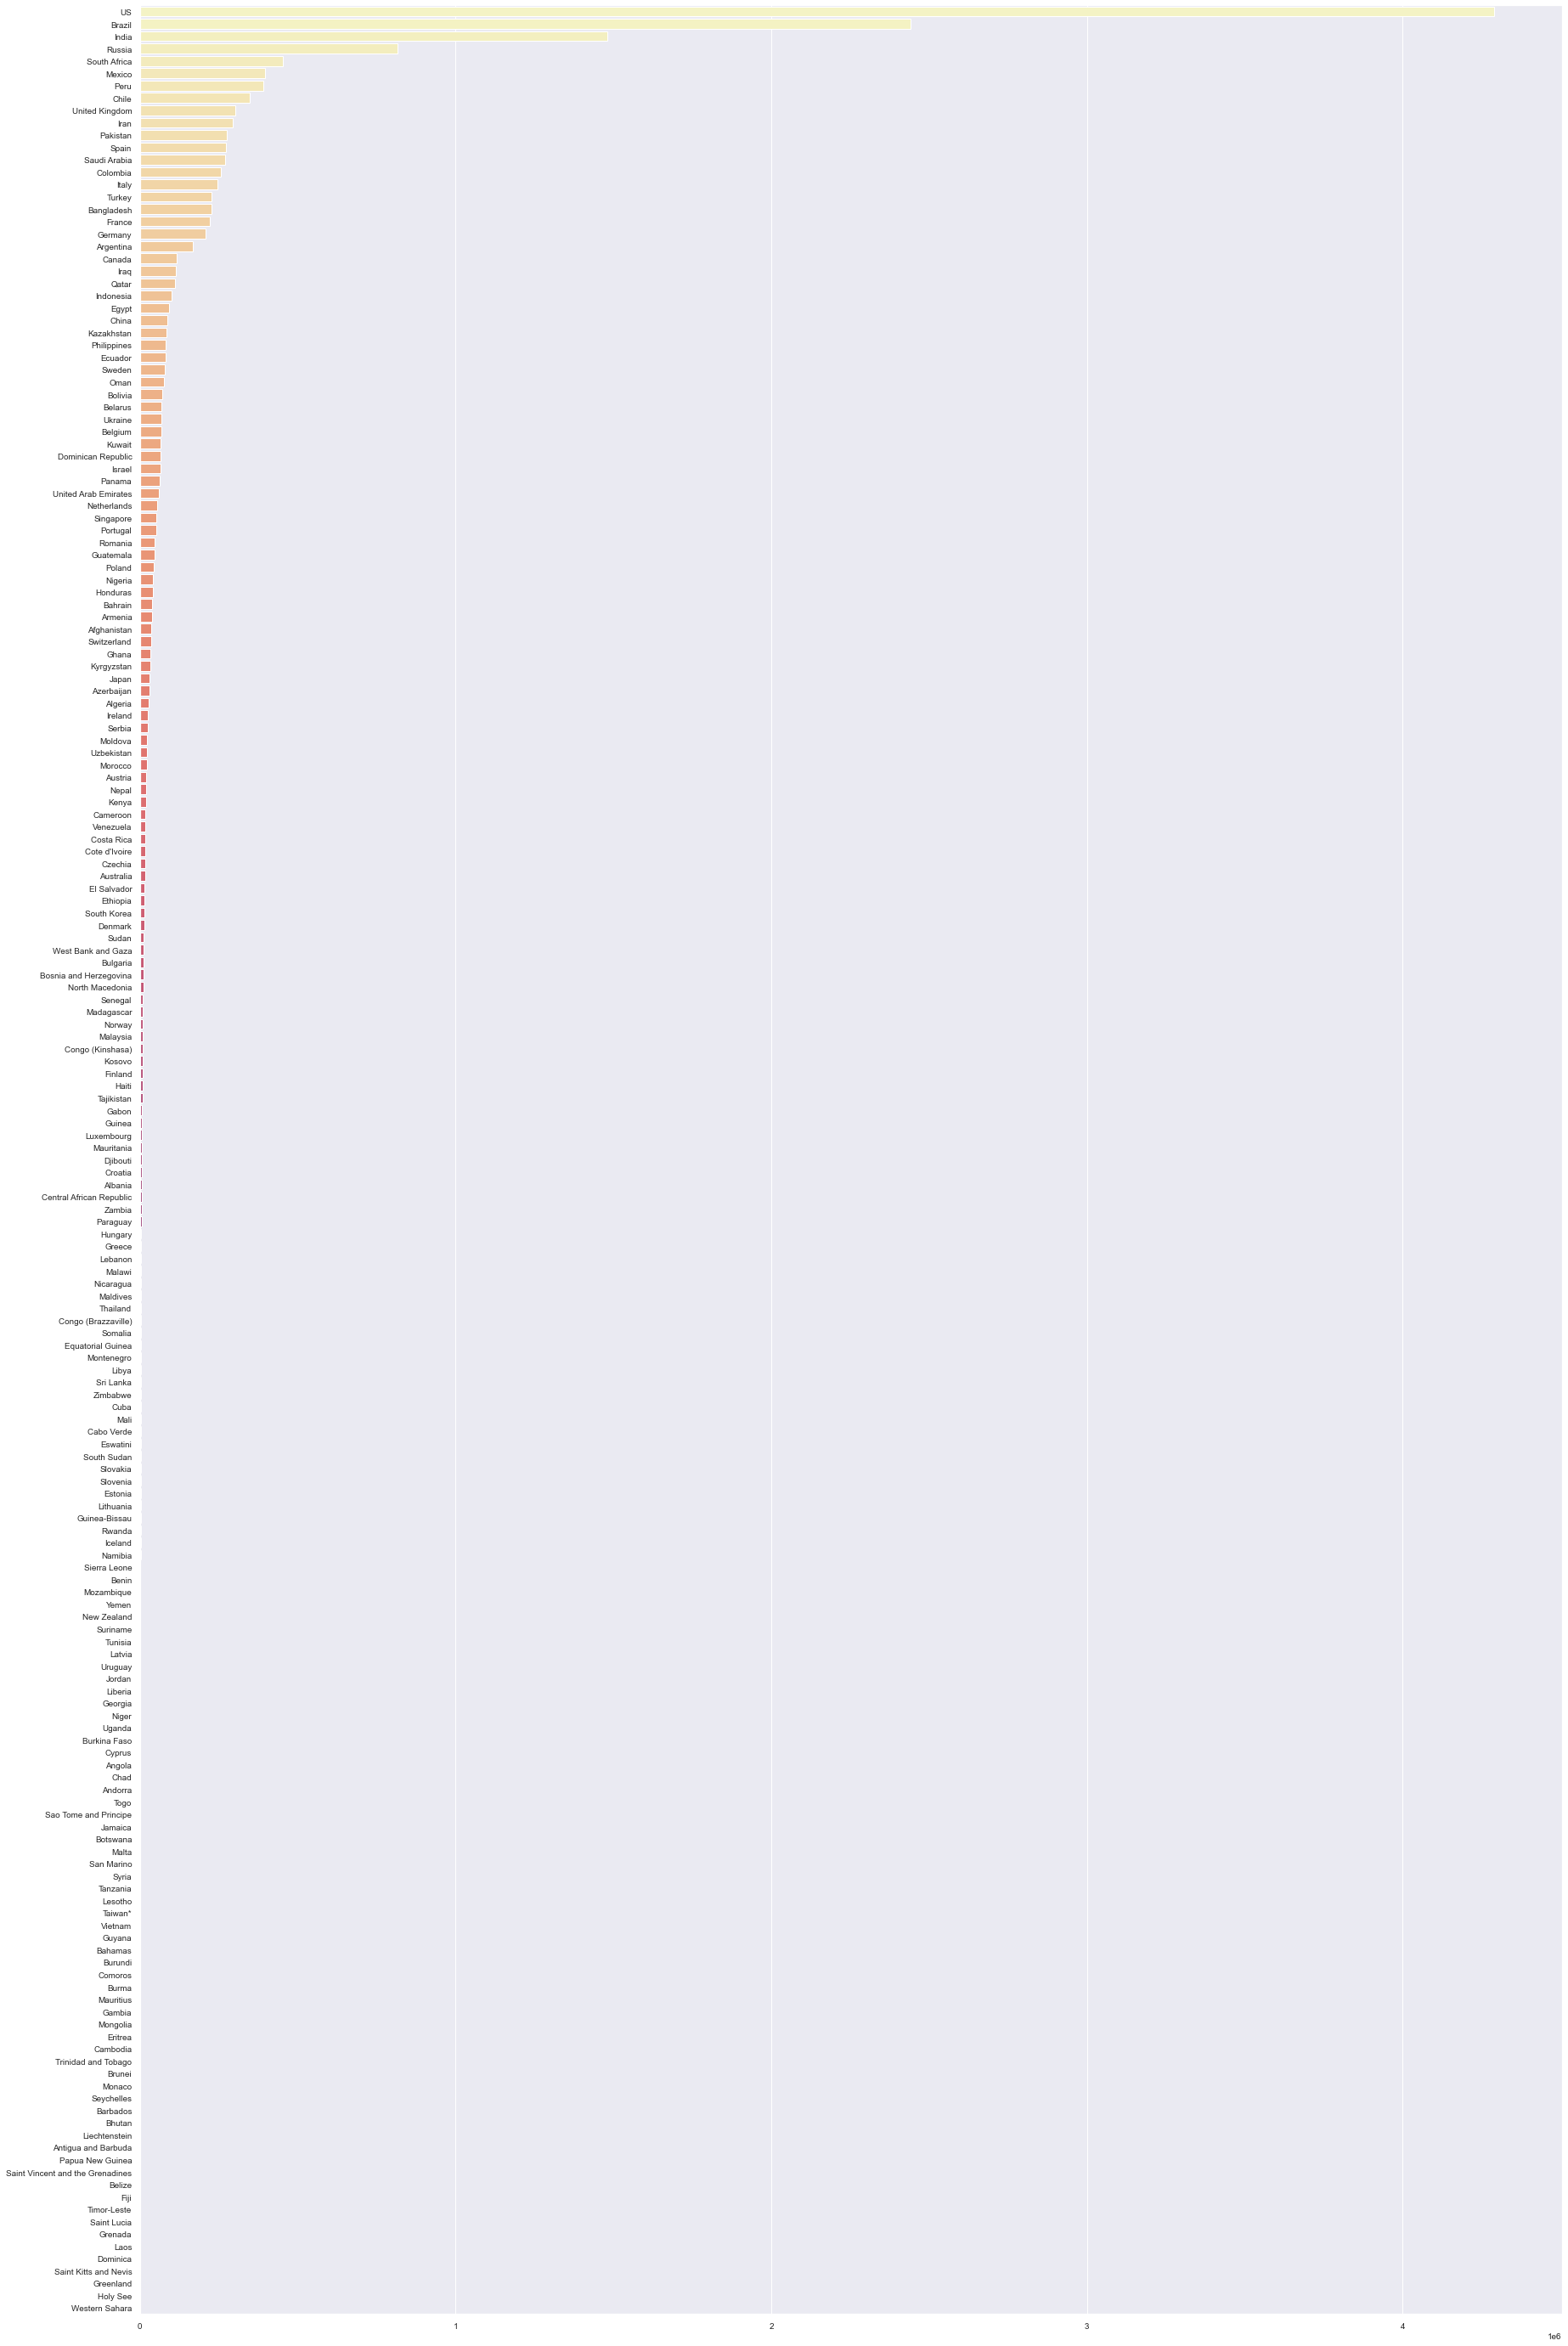

In [10]:
end, countries = (list(x) for x in zip(*sorted(zip(end, countries),reverse = True)))

sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(30, 50))
colors_cw = sns.color_palette('magma', len(countries))
sns.barplot(x = end,y = countries, palette = colors_cw[::-1])

In [11]:
dw=pd.read_csv("day_wise.csv")
dw.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dw['Date'], y=dw['Active'],
                    mode='lines', 
                    name='Active'))

fig.update_layout(title =  "Covid", title_font_size = 30)
fig.update_xaxes(title_text = 'Year')
fig.update_yaxes(title_text = "Cases")

In [13]:
preds

NameError: name 'preds' is not defined

In [ ]:

from prophet import Prophet
df2 = pd.DataFrame()
df2['Date'] = dw['Date']
df2['Confirmed'] = dw['Confirmed']
preds = df2.rename(columns={'Date':'ds', 'Confirmed':'y'})

preds.columns=['ds','y']
model = Prophet( yearly_seasonality=True)
model.fit(preds)

newcases = model.make_future_dataframe(periods = 2, freq='Y')  

forecast = model.predict(newcases)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast)
plt.title('Covid Case Predictions')
plt.xlabel('Date')
plt.ylabel('Covid Cases')

In [ ]:
preds

In [24]:
!pip install  prophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=a5b5e695eff2a64873181d0750e70df7450679e4afd27a1dd33db19423f83061
  Stored in directory: c:\users\kamal\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
